In [1]:
#import wave simulation module
from src import wavetorch

#import scientific libraries
import torch
import numpy as np

#Visualization libraries
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors

#Write Libraries
from pathlib import Path
import imageio
import pandas as pd
import json
import time

c:\Users\adamq\anaconda3\envs\wavetorch\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


# Configure GPU/CPU Usage

In [2]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev)  
print(dev)

cuda:0


In [3]:
torch.set_default_tensor_type('torch.cuda.FloatTensor')

# Initialize Parameters

In [4]:
#Set dimensions of simulation
N_x=480
N_y=640
N_t=2400
#Set discrete step values
dx=0.5
dy=0.5
dt=0.2/30
#Set wave propagation constant
c=30

In [5]:
#Create meshgrid to calculate wave function
r_space = wavetorch.get_r_space(N_x=N_x, N_y=N_y, dx=dx, dy=dy)

In [6]:
r_space.shape

torch.Size([640, 480])

In [7]:
#Pack wave metadata into dictionary
u_meta = {'dx':dx,
          'dy':dy,
          'dt':dt,
          'c':c,
          'N_t':N_t}

# Prepare Wave Source functions

In [8]:
#Define wave source functions
#impulse function
def g1(t):
    if isinstance(t, (list, np.ndarray)):
        output = np.zeros_like(t)
        output[0:200] = 1
        return 8*output
    else:
        if t <= dt*200:
            return 8
        else:
            return 0

#sine function
def g2(t):
    return np.sin(3.6*np.pi*t)

#Create list of function nodes
g_r1 = [{'coordinate':(int(N_x/3),int(N_y/3)), 'function':g1},
        {'coordinate':(int(N_x/2),int(N_y/2)), 'function':g2}]

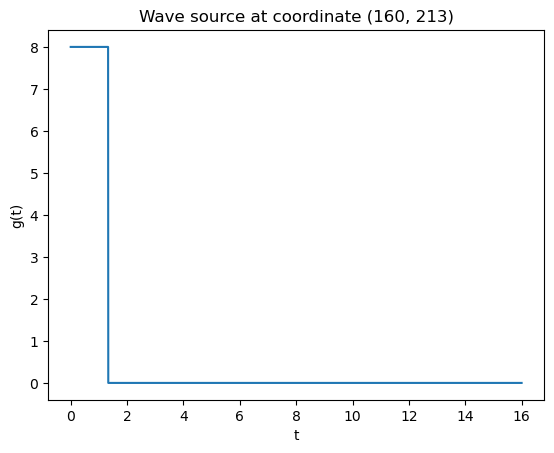

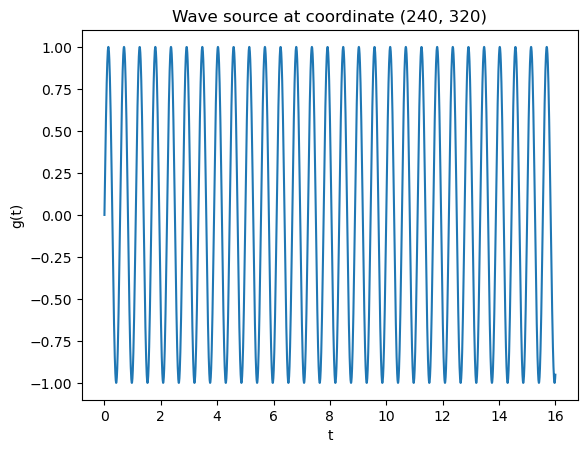

In [9]:
#Plot g functions
for g in g_r1:
    t_temp = np.linspace(0, N_t*dt, N_t+1)
    plt.figure()
    plt.plot(t_temp, g['function'](t_temp))
    plt.xlabel('t')
    plt.ylabel('g(t)')
    plt.title('Wave source at coordinate {}'.format(str(g['coordinate'])))

# Generate initial Wave state

C:\Users\adamq\AppData\Local\Temp\ipykernel_5128\2422087967.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(u1_t0.cpu().numpy(), cmap=cm.get_cmap(name='Greys'), origin='lower')


Text(0.5, 1.0, 'u1 at t=0')

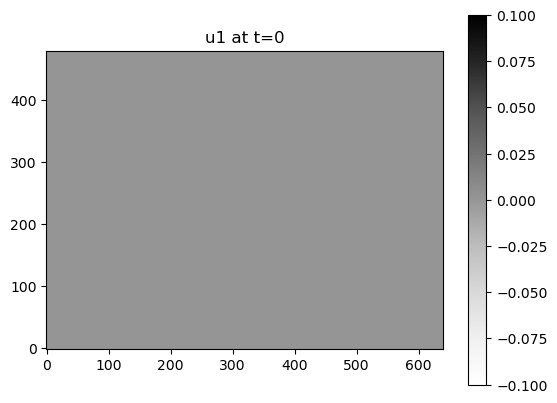

In [10]:
#Generate wave function value at time t = 0
#Wave function u is 0 at all values
u1_t0 = torch.zeros((N_x,N_y)).to(device)
#Plot wave function at t = 0
plt.figure()
plt.imshow(u1_t0.cpu().numpy(), cmap=cm.get_cmap(name='Greys'), origin='lower')
plt.colorbar()
plt.title('u1 at t=0')

# Calculate wave simulations

In [11]:
#Set timer to get run time
st = time.time()

#Call wave simulation function and store results as object
data2 = wavetorch.wave_eq(u1_t0, g_r1, u_meta)
#end timer
et = time.time()

#Print elapsed time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Calculating time step 0 out of 2400
Calculating time step 1 out of 2400
Calculating time step 2 out of 2400
Calculating time step 3 out of 2400
Calculating time step 4 out of 2400
Calculating time step 5 out of 2400
Calculating time step 6 out of 2400
Calculating time step 7 out of 2400
Calculating time step 8 out of 2400
Calculating time step 9 out of 2400
Calculating time step 10 out of 2400
Calculating time step 11 out of 2400
Calculating time step 12 out of 2400
Calculating time step 13 out of 2400
Calculating time step 14 out of 2400
Calculating time step 15 out of 2400
Calculating time step 16 out of 2400
Calculating time step 17 out of 2400
Calculating time step 18 out of 2400
Calculating time step 19 out of 2400
Calculating time step 20 out of 2400
Calculating time step 21 out of 2400
Calculating time step 22 out of 2400
Calculating time step 23 out of 2400
Calculating time step 24 out of 2400
Calculating time step 25 out of 2400
Calculating time step 26 out of 2400
Calculating

# Extract Signals

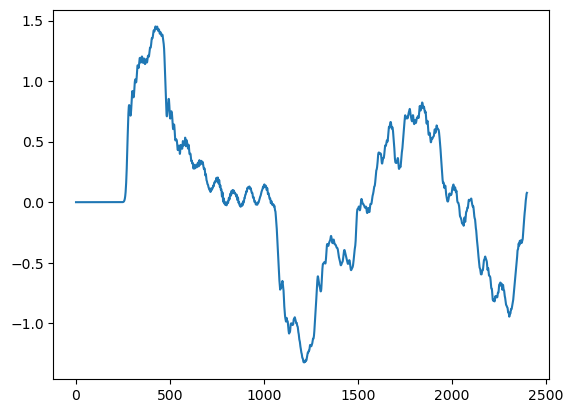

In [12]:
#Extract signal
u1_loc1 = data2['u'][:,int((1/3+1/2)/2*N_x), int((1/3+1/2)/2*N_y)]
#Plot signal
plt.plot(u1_loc1.cpu().numpy())

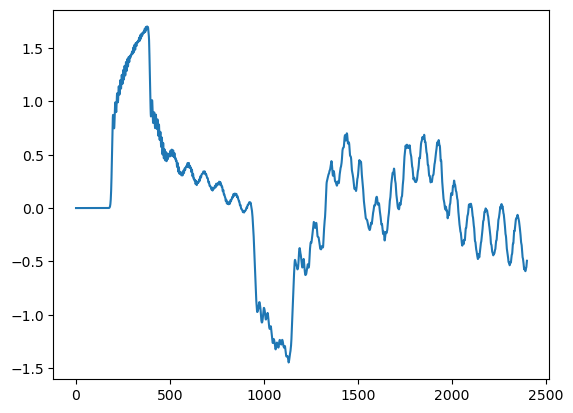

In [13]:
#Extract signal
u1_loc2 = data2['u'][:,int((1/3)*N_x), int((1/3)*N_y)]
#Plot signal
plt.plot(u1_loc2.cpu().numpy())

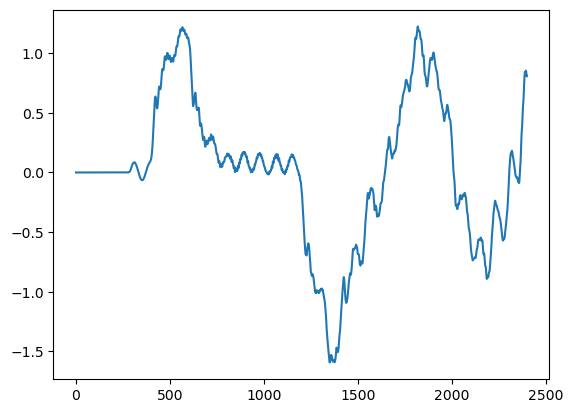

In [14]:
#Extract signal
u1_loc3 = data2['u'][:,int((1/2)*N_x), int((1/2)*N_y)]
#Plot signal
plt.plot(u1_loc3.cpu().numpy())

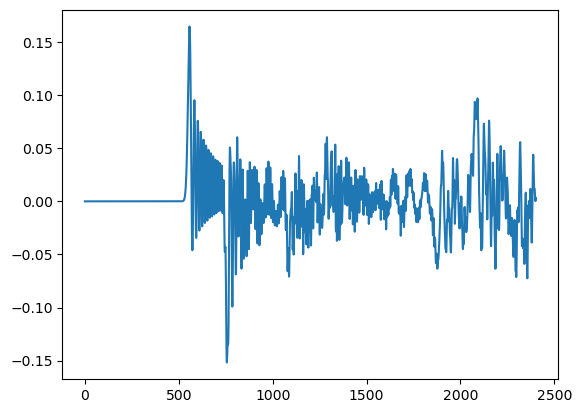

In [15]:
#Extract signal
u1_loc4 = data2['u'][:,1, int((1/3)*N_y)]
#Plot signal
plt.plot(u1_loc4.cpu().numpy())

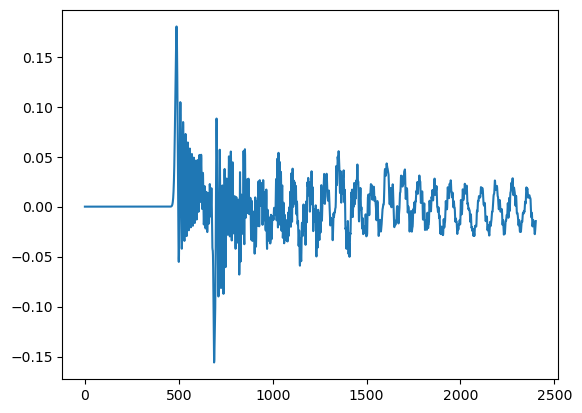

In [16]:
#Extract signal
u1_loc5 = data2['u'][:,int((1/2)*N_y), 1]
#Plot signal
plt.plot(u1_loc5.cpu().numpy())

# Put data into DataFrame

In [17]:
u1_loc1.cpu()

tensor([0.0000, 0.0000, 0.0000,  ..., 0.0675, 0.0746, 0.0771], device='cpu')

In [18]:
df = pd.DataFrame(data={'loc1': u1_loc1.cpu(), 'loc2': u1_loc2.cpu(), 'loc3': u1_loc3.cpu(), 'loc4': u1_loc4.cpu(), 'loc5': u1_loc5.cpu()})
df

,loc1,loc2,loc3,loc4,loc5
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2397,0.039148,-0.560679,0.844699,0.004131,-0.025586
2398,0.054343,-0.552371,0.827740,0.001034,-0.022961
2399,0.067457,-0.533642,0.811431,0.000286,-0.020467
2400,0.074552,-0.510458,0.804873,0.001584,-0.017776


# Save Data

In [19]:
#Configure save paths
save_folder = "exports"
save_path = "{}\\{}\\".format(str(Path.cwd()), save_folder)
save_path

'c:\\Github Desktop\\Wave-Simulation\\exports\\'

In [20]:
#Get maximum wave amplitude to normalize pixel values in video
value_max = data2['u'].max().item()
#Write to video file
name_mpr1 = 'data2.mp4'
imageio.mimwrite(save_path+name_mpr1, (255*((data2['u'].cpu()+value_max)/value_max)/2).type(torch.uint8), fps = 1/dt,
                format='mp4')

In [21]:
#Save to torch tensor object
name_file1 = 'data2.pt'
torch.save(data2['u'], save_path+name_file1)

In [22]:
#save metadata as json
name_metadata2 = 'data2 metadata'

with open('{}{}.json'.format(save_path, name_metadata2), "wb") as f:
    f.write(json.dumps(data2['metadata']).encode("utf-8"))

In [23]:
#Save signals at specific locations to csv
name_file2 = 'signals2.csv'
df.to_csv(save_path+name_file2, index=False)

# Clear Memory

In [24]:
torch.cuda.empty_cache()